In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [16]:
# Charger les données prétraitées
X = pd.read_pickle("X_matrix_proteins_nb.pkl")
Y = pd.read_pickle("Y_matrix_proteins_nb.pkl")

In [17]:
print("Prétraitement des données...")
X = X.drop(columns=["Yeast_ID"]).fillna(0)
Y = Y.drop(columns=["Yeast_ID"]).fillna(Y.drop(columns=["Yeast_ID"]).mean())

Prétraitement des données...


In [18]:
# Diviser les données en ensembles d'entraînement et de test
print("Division des données en ensembles d'entraînement et de test...")
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True)

print(f"Dimensions de X_train : {X_train.shape}, X_test : {X_test.shape}")
print(f"Dimensions de y_train : {y_train.shape}, y_test : {y_test.shape}")

Division des données en ensembles d'entraînement et de test...
Dimensions de X_train : (594, 12542), X_test : (198, 12542)
Dimensions de y_train : (594, 1), y_test : (198, 1)


In [19]:
# Définir une fonction pour entraîner ElasticNet
def train_elasticnet(X_train, y_train, X_test, y_test):
    """
    Entraîne un modèle ElasticNet et évalue ses performances.
    """
    # Définir les hyperparamètres à rechercher
    param_grid = {
        "alpha": [0.05,0.1, 0.2, 0.5, 1.0], #, 5.0, 10.0],  # Paramètre de régularisation
        "l1_ratio": [0.05, 0.1, 0.2,  0.5, 0.7], #, 0.9, 1.0],  # Ratio entre L1 (LASSO) et L2 (Ridge)
    }

    # Initialiser ElasticNet avec un nombre d'itérations maximal élevé
    elastic_net = ElasticNet(max_iter=10000, random_state=42)

    # Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
    grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring="r2", verbose=2, n_jobs=-1)
    grid_search.fit(X_train, y_train.values.ravel())  # y_train.values.ravel() pour une sortie compatible avec ElasticNet

    # Meilleur modèle trouvé
    best_model = grid_search.best_estimator_

    # Prédictions sur les ensembles d'entraînement et de test
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Évaluer les performances
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    print("\nMeilleurs hyperparamètres :", grid_search.best_params_)
    print("R² Score (train):", train_r2)
    print("R² Score (test):", test_r2)
    print("Mean Squared Error (train):", train_mse)
    print("Mean Squared Error (test):", test_mse)

    return best_model, y_train_pred, y_test_pred

In [20]:
# Entraîner ElasticNet 
print("Entraînement du modèle ElasticNet...")
best_model, y_train_pred, y_test_pred = train_elasticnet(X_train, y_train, X_test, y_test)

Entraînement du modèle ElasticNet...
Fitting 5 folds for each of 25 candidates, totalling 125 fits


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.603e-01, tolerance: 1.923e-03
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.05, l1_ratio=0.05; total time= 1.3min


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.634e-02, tolerance: 1.923e-03
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.05, l1_ratio=0.1; total time= 1.6min


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.652e-01, tolerance: 2.700e-03
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.05, l1_ratio=0.05; total time= 1.9min


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.724e-02, tolerance: 2.700e-03
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.05, l1_ratio=0.1; total time= 2.0min


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.774e-02, tolerance: 2.549e-03
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.05, l1_ratio=0.1; total time= 2.0min


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.631e-01, tolerance: 2.549e-03
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.05, l1_ratio=0.05; total time= 2.0min


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.229e-01, tolerance: 2.581e-03
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.05, l1_ratio=0.05; total time= 2.1min


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.630e-01, tolerance: 2.842e-03
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.05, l1_ratio=0.05; total time= 2.2min
[CV] END ...........................alpha=0.05, l1_ratio=0.5; total time=  14.8s
[CV] END ...........................alpha=0.05, l1_ratio=0.5; total time=  16.5s
[CV] END ...........................alpha=0.05, l1_ratio=0.2; total time=  47.6s
[CV] END ...........................alpha=0.05, l1_ratio=0.5; total time=   7.7s
[CV] END ...........................alpha=0.05, l1_ratio=0.5; total time=  18.5s
[CV] END ...........................alpha=0.05, l1_ratio=0.7; total time=   5.8s
[CV] END ...........................alpha=0.05, l1_ratio=0.5; total time=  24.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.710e-02, tolerance: 2.581e-03
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.05, l1_ratio=0.1; total time= 2.0min
[CV] END ...........................alpha=0.05, l1_ratio=0.2; total time= 1.3min
[CV] END ...........................alpha=0.05, l1_ratio=0.7; total time=   5.4s
[CV] END ...........................alpha=0.05, l1_ratio=0.7; total time=   3.9s
[CV] END ...........................alpha=0.05, l1_ratio=0.2; total time= 1.4min
[CV] END ...........................alpha=0.05, l1_ratio=0.7; total time=   6.2s
[CV] END ...........................alpha=0.05, l1_ratio=0.7; total time=   7.0s
[CV] END ...........................alpha=0.05, l1_ratio=0.2; total time= 1.3min
[CV] END ...........................alpha=0.05, l1_ratio=0.2; total time= 1.5min


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.873e-02, tolerance: 2.842e-03
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.05, l1_ratio=0.1; total time= 2.3min
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=  56.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time= 1.5min


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.460e-02, tolerance: 1.923e-03
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.05; total time= 1.6min
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time= 1.6min


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.319e-01, tolerance: 2.549e-03
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.05; total time= 1.7min


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.348e-01, tolerance: 2.581e-03
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.05; total time= 1.8min


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.148e-02, tolerance: 2.700e-03
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.05; total time= 1.9min
[CV] END ............................alpha=0.1, l1_ratio=0.2; total time=  12.9s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   2.2s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   2.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   1.7s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   2.1s
[CV] END ............................alpha=0.1, l1_ratio=0.2; total time=  27.4s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   1.3s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   2.6s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   1.5s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.6s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   1.2s
[CV] END ...................

/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.147e-02, tolerance: 2.842e-03
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.05; total time= 2.2min
[CV] END ............................alpha=0.1, l1_ratio=0.2; total time=  28.9s
[CV] END ............................alpha=0.1, l1_ratio=0.2; total time=  33.4s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=  26.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time= 1.3min
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time= 1.4min
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=  12.6s
[CV] END ...........................alpha=0.2, l1_ratio=0.05; total time= 1.0min
[CV] END ............................alpha=0.2, l1_ratio=0.2; total time=   3.8s
[CV] END ............................alpha=0.2, l1_ratio=0.2; total time=   3.7s
[CV] END ............................alpha=0.2, l1_ratio=0.2; total time=   2.7s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=  30.3s
[CV] END ...................

In [21]:
print(best_model)

ElasticNet(alpha=0.1, l1_ratio=0.7, max_iter=10000, random_state=42)


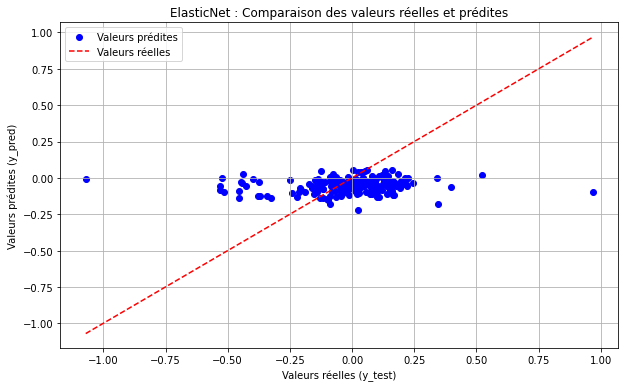

In [22]:
# Visualiser les prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color="blue", label="Valeurs prédites")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Valeurs réelles")
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Valeurs prédites (y_pred)")
plt.title("ElasticNet : Comparaison des valeurs réelles et prédites")
plt.legend()
plt.grid()
plt.show()

In [23]:
# Afficher les coefficients importants
print("\nAffichage des coefficients importants...")
coefficients = pd.Series(best_model.coef_, index=X_train.columns)
coefficients_sorted = coefficients.sort_values(ascending=False)
top_features = coefficients_sorted.head(15)
print("\nTop 10 des coefficients les plus importants :")
print(top_features)


Affichage des coefficients importants...

Top 10 des coefficients les plus importants :
YCL014W      0.003542
YDR483W      0.003139
YDR420W      0.002293
YOR384W      0.002007
YCR067C      0.001172
YPR115W      0.000862
YGL255W      0.000854
YHL045W      0.000823
YJL056C      0.000782
YLR154W-F    0.000388
YPL158C      0.000353
YLR454W      0.000339
YEL025C      0.000319
YMR219W      0.000140
YMR265C      0.000095
dtype: float64


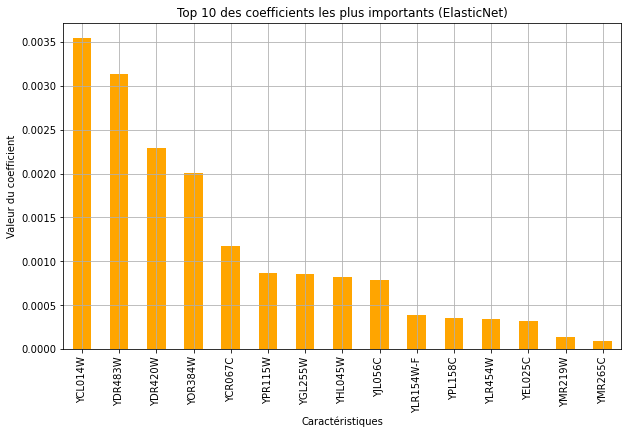

In [24]:
# Visualiser les coefficients importants
plt.figure(figsize=(10, 6))
top_features.plot(kind="bar", color="orange")
plt.title("Top 10 des coefficients les plus importants (ElasticNet)")
plt.xlabel("Caractéristiques")
plt.ylabel("Valeur du coefficient")
plt.grid()
plt.show()